# Heatmap of Attack Directions
The code demonstrates how to extract the coordinates of a team's attack directions and displays the points of arrival and intensity through a heatmap.

## Setup 
import of the needed libraries

In [6]:
from datavolley import read_dv
import datavolley.pycourt as pycourt
import datavolley.pycourt as half_pycourt 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Data reading
In this case, we will use the sample data that PyDataVolley is built upon and extract the actions using the get_plays() method.

In [7]:
dvf = read_dv.DataVolley()
plays = dvf.get_plays()

## Visualize the arrival of attacks
From the game actions we extract the information the x and y coordinates of the point of arrival of the attack.
Our goal is to visualize the points where the ball arrives: where most of the play therefore takes place.

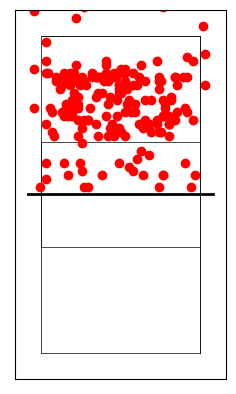

In [8]:
attacks_data= plays[(plays['skill'] == 'Attack') & (plays.home_team==dvf.home_team)] 
coordinate_df = attacks_data[['end_coordinate_x','end_coordinate_y']]

def plot_coordinates(coordinates):
    pycourt.pycourt()
    # Plot the coordinates
    plt.scatter(coordinates['end_coordinate_x'], coordinates['end_coordinate_y'], color='red')
    plt.show(block=True)

plot_coordinates(coordinate_df)

## Visualize the heatmap of attacks
Using the same data we create the kernel density with seaborn and draw it on the field


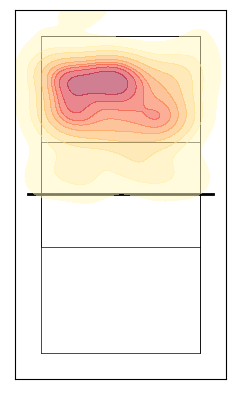

In [9]:
# heatmap of the end direction of attacks
fig, ax = plt.subplots()
pycourt.pycourt(ax)
sns.kdeplot(x=coordinate_df['end_coordinate_x'], y=coordinate_df['end_coordinate_y'], ax=ax, cmap="YlOrRd", fill=True, alpha=0.5)
plt.show()


# Half a field
Among the functions available in pydatavolley is the ability to display half a court.
Here we show how to use it


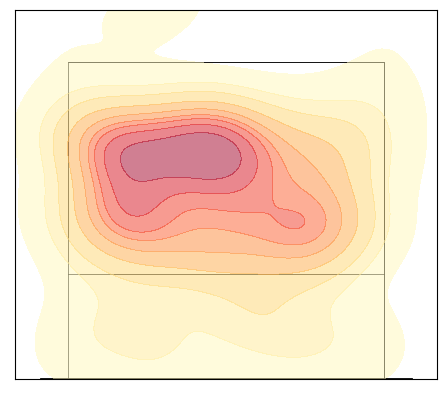

In [10]:
# Creating the volleyball court
fig, ax = plt.subplots()
pycourt.half_pycourt(ax)
# Creating the heatmap
sns.kdeplot(x=coordinate_df['end_coordinate_x'], y=coordinate_df['end_coordinate_y'], ax=ax, cmap="YlOrRd", fill=True, alpha=0.5)
plt.show()

In [15]:
df = plays[(plays['skill'] == 'Attack')]
total_attacks = df.groupby(['player_name', 'team']).size().reset_index(name='total')

In [16]:
total_attacks

,player_name,team,total
0,Aiko Jones,University of Louisville,9
1,Alexa Hendricks,University of Louisville,8
2,Alli Papesh,University of Dayton,15
3,Amaya Tillman,University of Louisville,8
4,Amelia Moore,University of Dayton,9
5,Anna Stevenson,University of Louisville,11
6,Bridget Doherty,University of Dayton,3
7,Brooke Westbeld,University of Dayton,6
8,Claire Chaussee,University of Louisville,12
9,Emily Scott,University of Louisville,10
